In [2]:
pwd()

"/home/xlx0727/Scripts/Statistic/gplsim/qgplsim"

In [11]:
include("localLinear_quantReg.ji")

Main.localLinear_quantReg

In [41]:
using Plots
include("DGP.ji")
include("qgplsim.ji")
α = [-1, 2] # single index for x
θ = [2, 1]  # linear for x, <α, θ> = 0 for identification
# γ = [0, 0]
# β = [0, -0]
γ = [1, 2] # single index for z
β = [1, -0.5] # linear for z

# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)

n = 500
# p = length(α)
# q = length(γ)

500

In [46]:
τ = 0.5
X, Z, y = dgp(n, γ, θ, α, β, true)
model1 = qgplsim.model(X, Z, y, τ)
@time alpha, theta, gamma = qgplsim.estimator(model1)

  3.447527 seconds (4.40 M allocations: 13.940 GiB, 22.13% gc time)


([-0.4529438038701792, 0.8170153939984729], [1.9851257751352345 1.214896081608596], [0.24979014682355313, 0.5030285048116774])

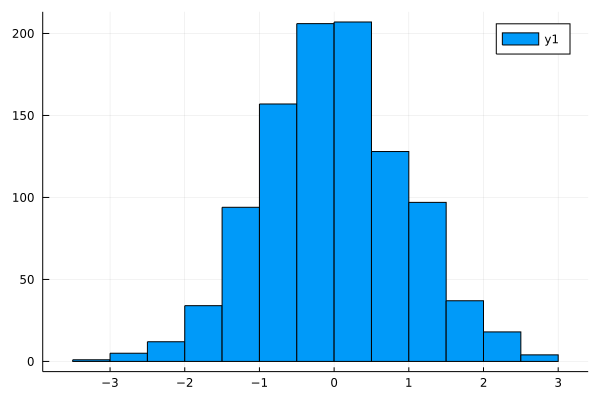

In [192]:
v = X * alpha # g(Xα + Zγ) => univar func. g(v + zγ) after α was determined and  Z = z
histogram(v)

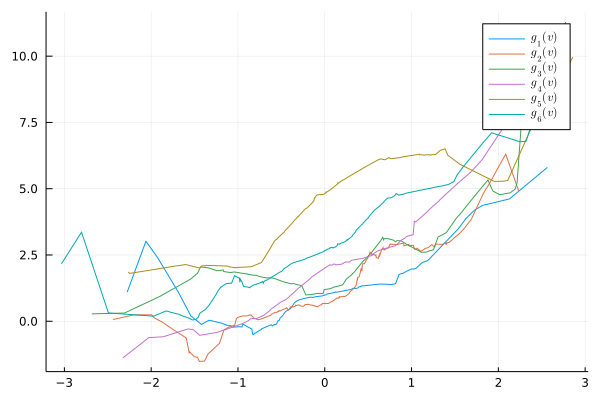

In [194]:
categ, index, = qgplsim.collection(Z)
g, dg = qgplsim.Gz_DGz(v, Z, y) # g: g(v), dg: g'(v)
using LaTeXStrings
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]

    plot!(fig, sorted_vm, sorted_gm, label = L"g_{%$m} (v)")

end
fig

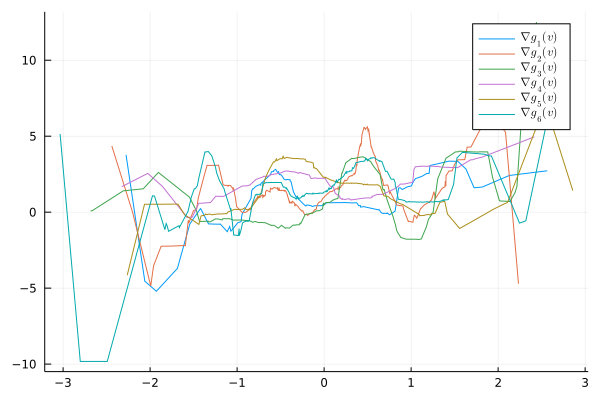

In [195]:
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_vm = vm[indm]
    plot!(fig, sorted_vm, sorted_dgm, label = L"\nabla g_{%$m} (v)")

end
fig

In [169]:
p = length(α)
# q = length(γ)
Theta = zeros(100, p)
Alpha = zeros(100, p)
Gamma = zeros(100, p)
import Base.Threads.@threads

In [170]:
t = time()
len = 50
@threads for i in 1:2
        for j in 1:len
    X, Z, y = dgp(n, γ, θ, α, β, true)
    model_ij = qgplsim.model(X, Z, y)
    Alpha[len*(i - 1) + j, :], Theta[len*(i - 1) + j, :],Gamma[len*(i - 1) + j, :] = qgplsim.estimator(model_ij)
    end
end
println("MC Computing time: ", time() - t)
println(sum(Alpha, dims = 1))
println(sum(Theta, dims = 1))
println(sum(Gamma, dims = 1))


MC Computing time: 1571.398861169815
[-9.48782405172192 54.48768267624153]
[150.17293297672737 129.70426279288793]
[18.93532354870122 39.551471151266654]


In [181]:
set_alpha, index_alpha, most_alpha = qgplsim.collection(sign.(Alpha))

(Any[[-1.0, 1.0], [1.0, -1.0], [1.0, 1.0]], Dict{Any, Any}([-1.0, 1.0] => [1, 3, 5, 9, 10, 11, 12, 14, 15, 16  …  86, 87, 88, 90, 92, 94, 95, 97, 98, 99], [1.0, -1.0] => [2, 6, 8, 25, 28, 30, 35, 42, 43, 64, 66, 67, 77, 79, 84, 89, 96], [1.0, 1.0] => [4, 7, 13, 18, 20, 21, 22, 38, 56, 59, 65, 69, 74, 78, 85, 91, 93, 100]), [-1.0, 1.0])

In [182]:
dc = index_alpha
mc = most_alpha

2-element Vector{Float64}:
 -1.0
  1.0

In [183]:
rAlpha = Alpha[dc[mc], :]
rTheta = Theta[dc[mc], :]
rGamma = Gamma[dc[mc], :]
ns, = size(rAlpha)

(65, 2)

In [184]:
sum(rAlpha, dims = 1)/ns

1×2 Matrix{Float64}:
 -0.486614  0.78903

In [185]:
sum(rTheta, dims = 1)/ns

1×2 Matrix{Float64}:
 1.92226  1.31159

In [186]:
sum(rGamma, dims = 1)/ns

1×2 Matrix{Float64}:
 0.215975  0.442239